### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

        country  beer_servings  spirit_servings  wine_servings  \
15      Belarus            142              373             42   
98    Lithuania            343              244             56   
3       Andorra            245              138            312   
68      Grenada            199              438             28   
61       France            127              151            370   
..          ...            ...              ...            ...   
97        Libya              0                0              0   
103    Maldives              0                0              0   
111      Monaco              0                0              0   
158     Somalia              0                0              0   
147  San Marino              0                0              0   

     total_litres_of_pure_alcohol  alcohol_index  
15                           14.4     185.666667  
98                           12.9     214.333333  
3                            12.4     231.666667  
68 

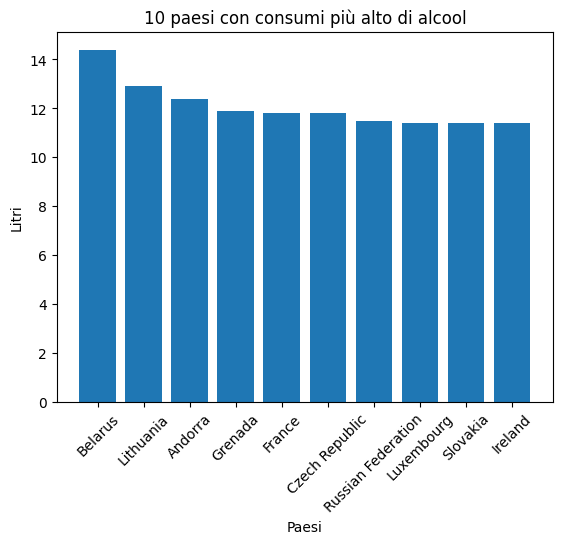

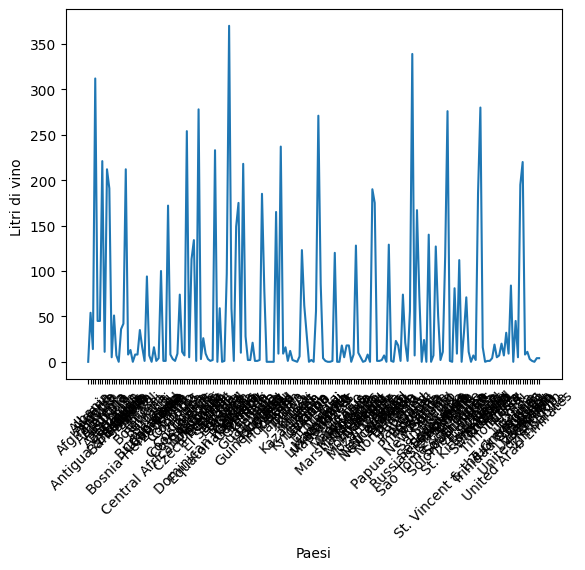

In [121]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

df['alcohol_index']= (df.beer_servings+df.wine_servings+df.spirit_servings)/3

df_sorted=df.sort_values(by='total_litres_of_pure_alcohol',ascending=False)
print(df_sorted)

top_10=df_sorted.head(10)


df_alcool=df.sort_values(by='alcohol_index', ascending=False)
print(df_alcool.head(1))

print(df.country[df['beer_servings'] > 100])
plt.bar(top_10['country'], top_10['total_litres_of_pure_alcohol'])
plt.xlabel('Paesi')
plt.ylabel('Litri')
plt.title('10 paesi con consumi più alto di alcool')
plt.xticks(rotation=45)
plt.show()
df.sort_values(by='country', ascending=True, inplace=True)
df['wine_servings']
plt.plot(df['country'],df['wine_servings'])
plt.xlabel('Paesi')
plt.ylabel('Litri di vino ')
plt.xticks(rotation=45)
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

    search_location  salary_year_avg
1           Albania     79472.500000
2           Algeria     44550.000000
5         Argentina    105212.343750
6           Armenia     78757.000000
7         Australia    118987.574324
..              ...              ...
164         Uruguay     69333.333333
165      Uzbekistan     30750.000000
168         Vietnam     90927.236364
171          Zambia     90670.000000
172        Zimbabwe     67056.666667

[113 rows x 2 columns]
        job_country  job_count
0     United States     206292
1             India      51088
2    United Kingdom      40375
3            France      39922
4           Germany      27694
..              ...        ...
155          Guinea          4
156         Lesotho          3
157      Mauritania          3
158          Bhutan          3
159        Maldives          2

[160 rows x 2 columns]
                          Max      Min
search_location                       
Afghanistan               NaN      NaN
Albania            

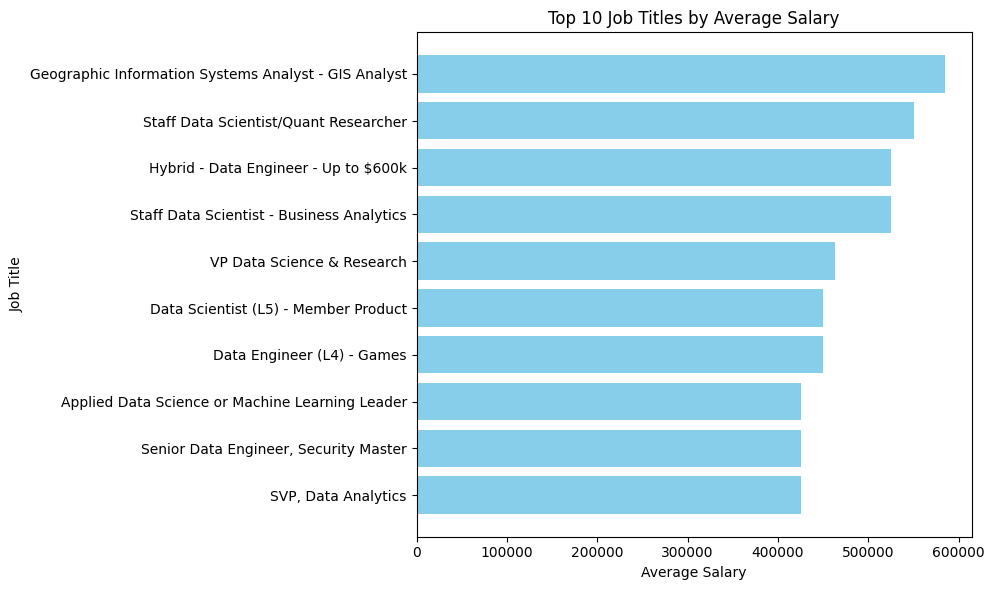

In [179]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_salary=df.dropna(subset='salary_year_avg')
df.head()
stipendio_medio=df.groupby('search_location')['salary_year_avg'].mean().reset_index()
stipendio_medio.dropna(subset=['salary_year_avg'], inplace=True)
print(stipendio_medio)

job_count = df['job_country'].value_counts().reset_index()
job_count.columns = ['job_country', 'job_count']
print(job_count)

#intervallo stipendi, prendere quelli più alti per paese e quello più basso
Intervallo_stip=pd.DataFrame(df.groupby('search_location')['salary_year_avg'].max())
Intervallo_stip['Min']=df.groupby('search_location')['salary_year_avg'].min()
Intervallo_stip.columns= ['Max','Min']
print(Intervallo_stip)

# Calcola lo stipendio medio per ogni job_title
job_title_salary_avg = df.groupby('job_title')['salary_year_avg'].mean().reset_index()

# Rinomina le colonne per chiarezza
job_title_salary_avg.columns = ['job_title', 'average_salary']

# Mostra il risultato
print(job_title_salary_avg.sort_values(by='average_salary', ascending=False).head(10))


# Ordina i dati dallo stipendio medio più alto al più basso
job_title_salary_avg_sorted = job_title_salary_avg.sort_values(by='average_salary', ascending=False).head(10)

# Crea un grafico a barre orizzontali
plt.figure(figsize=(10, 6))
plt.barh(job_title_salary_avg_sorted['job_title'], job_title_salary_avg_sorted['average_salary'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles by Average Salary')
plt.gca().invert_yaxis()  # Inverti l'asse y per mostrare il valore più alto in cima
plt.tight_layout()
plt.show()